HB 2021

In [20]:
from pandas import read_csv
from joblib import dump, load
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# Leyendo datos de Lima centro, norte, sur y este
datosCentro = read_csv("./data/Niños LIMA DIRIS CENTRO.csv",header=0)
datosNorte = read_csv("./data/Niños LIMA DIRIS NORTE.csv",header=0)
datosSur = read_csv("./data/Niños LIMA DIRIS SUR.csv",header=0)
datosEste = read_csv("./data/Niños LIMA DIRIS ESTE.csv",header=0)

In [22]:
datos = pd.concat([datosCentro, datosNorte, datosSur, datosEste], axis = 0)

In [23]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122773 entries, 0 to 17892
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Diresa            122773 non-null  object 
 1   Red               122773 non-null  object 
 2   Microred          122773 non-null  object 
 3   EESS              122773 non-null  object 
 4   Dpto_EESS         122773 non-null  object 
 5   Prov_EESS         122773 non-null  object 
 6   Dist_EESS         122773 non-null  object 
 7   Renipress         122773 non-null  int64  
 8   FechaAtencion     122773 non-null  object 
 9   Pais              122773 non-null  object 
 10  Sexo              122773 non-null  object 
 11  FechaNacimiento   122773 non-null  object 
 12  EdadMeses         122773 non-null  int64  
 13  UbigeoPN          122773 non-null  object 
 14  DepartamentoPN    122773 non-null  object 
 15  ProvinciaPN       122773 non-null  object 
 16  DistritoPN        122773 n

In [24]:
# Filtrando las columnas a utilizar
datos.drop(['Red','Diresa','Microred', 'EESS', 'Dpto_EESS', 
            'Prov_EESS', 'Dist_EESS', 'Renipress', 'FechaAtencion', 
            'Pais', 'FechaNacimiento', 'UbigeoPN', 'DepartamentoPN',
            'ProvinciaPN','DistritoPN', 'CentroPobladoPN', 'Pin', 
            'Sesion', 'MES', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN', 
            'DistritoREN', 'AlturaREN','FechaHemoglobina','HBC',
            'Cred'],axis=1,inplace=True)

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122773 entries, 0 to 17892
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sexo            122773 non-null  object 
 1   EdadMeses       122773 non-null  int64  
 2   Juntos          122773 non-null  object 
 3   SIS             122773 non-null  object 
 4   Qaliwarma       122773 non-null  object 
 5   Peso            122773 non-null  object 
 6   Talla           122773 non-null  object 
 7   Hemoglobina     122773 non-null  float64
 8   Suplementacion  122773 non-null  int64  
 9   Consejeria      122773 non-null  int64  
 10  Dx_Anemia       122773 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [25]:
# Transformando strings en valores numericos
datos.SIS = pd.to_numeric(datos.SIS, errors='coerce')
datos.Juntos = pd.to_numeric(datos.Juntos, errors='coerce')
datos.Qaliwarma = pd.to_numeric(datos.Qaliwarma, errors='coerce')
# convert objecto to numeric Peso, Talla
datos.Peso = pd.to_numeric(datos.Peso, errors='coerce')
datos.Talla = pd.to_numeric(datos.Talla, errors='coerce')

In [26]:
# set dummies for Sexo in place 
datos = pd.get_dummies(datos, columns=['Sexo'], drop_first=True)


In [27]:
datos.Dx_Anemia.replace(["Normal"],0 , inplace= True)
datos.Dx_Anemia.replace(["Anemia Leve"],1 , inplace= True)
datos.Dx_Anemia.replace(["Anemia Moderada"],2 , inplace= True)
datos.Dx_Anemia.replace(["Anemia Severa"],3 , inplace= True)

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122773 entries, 0 to 17892
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   EdadMeses       122773 non-null  int64  
 1   Juntos          105435 non-null  float64
 2   SIS             105435 non-null  float64
 3   Qaliwarma       105435 non-null  float64
 4   Peso            44974 non-null   float64
 5   Talla           43128 non-null   float64
 6   Hemoglobina     122773 non-null  float64
 7   Suplementacion  122773 non-null  int64  
 8   Consejeria      122773 non-null  int64  
 9   Dx_Anemia       122773 non-null  int64  
 10  Sexo_M          122773 non-null  bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 10.4 MB


Eliminar Peso y Talla

In [30]:
#delete Peso and Talla from dataframe
datos.drop(['Peso','Talla'],axis=1,inplace=True)

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122773 entries, 0 to 17892
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   EdadMeses       122773 non-null  int64  
 1   Juntos          105435 non-null  float64
 2   SIS             105435 non-null  float64
 3   Qaliwarma       105435 non-null  float64
 4   Hemoglobina     122773 non-null  float64
 5   Suplementacion  122773 non-null  int64  
 6   Consejeria      122773 non-null  int64  
 7   Dx_Anemia       122773 non-null  int64  
 8   Sexo_M          122773 non-null  bool   
dtypes: bool(1), float64(4), int64(4)
memory usage: 8.5 MB


In [33]:
datos.head()

,EdadMeses,Juntos,SIS,Qaliwarma,Hemoglobina,Suplementacion,Consejeria,Dx_Anemia,Sexo_M
0,35,NaN,NaN,NaN,14.0,1,0,0,False
1,20,NaN,NaN,NaN,11.0,0,0,0,False
2,38,NaN,NaN,NaN,13.0,1,1,0,True
3,37,NaN,NaN,NaN,13.1,1,1,0,False
4,37,NaN,NaN,NaN,11.9,0,1,0,False


In [32]:
# Limpieza de datos nulos
datos = datos.fillna(0)

In [33]:
datos.isnull().sum()

EdadMeses         0
Juntos            0
SIS               0
Qaliwarma         0
Hemoglobina       0
Suplementacion    0
Consejeria        0
Dx_Anemia         0
Sexo_M            0
dtype: int64

In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122773 entries, 0 to 17892
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   EdadMeses       122773 non-null  int64  
 1   Juntos          122773 non-null  float64
 2   SIS             122773 non-null  float64
 3   Qaliwarma       122773 non-null  float64
 4   Hemoglobina     122773 non-null  float64
 5   Suplementacion  122773 non-null  int64  
 6   Consejeria      122773 non-null  int64  
 7   Dx_Anemia       122773 non-null  int64  
 8   Sexo_M          122773 non-null  bool   
dtypes: bool(1), float64(4), int64(4)
memory usage: 8.5 MB


In [35]:
datos.head()

,EdadMeses,Juntos,SIS,Qaliwarma,Hemoglobina,Suplementacion,Consejeria,Dx_Anemia,Sexo_M
0,35,0.0,0.0,0.0,14.0,1,0,0,False
1,20,0.0,0.0,0.0,11.0,0,0,0,False
2,38,0.0,0.0,0.0,13.0,1,1,0,True
3,37,0.0,0.0,0.0,13.1,1,1,0,False
4,37,0.0,0.0,0.0,11.9,0,1,0,False


In [37]:
#Transformando los datos de la columna de Dx_Anemia segun su gravedad
datos.Dx_Anemia.replace(["Normal"],0 , inplace= True)
datos.Dx_Anemia.replace(["Anemia Leve"],1 , inplace= True)
datos.Dx_Anemia.replace(["Anemia Moderada"],2 , inplace= True)
datos.Dx_Anemia.replace(["Anemia Severa"],3 , inplace= True)

In [38]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122773 entries, 0 to 17892
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   EdadMeses       122773 non-null  int64  
 1   Juntos          122773 non-null  float64
 2   SIS             122773 non-null  float64
 3   Qaliwarma       122773 non-null  float64
 4   Hemoglobina     122773 non-null  float64
 5   Suplementacion  122773 non-null  int64  
 6   Consejeria      122773 non-null  int64  
 7   Dx_Anemia       122773 non-null  int64  
 8   Sexo_M          122773 non-null  bool   
dtypes: bool(1), float64(4), int64(4)
memory usage: 8.5 MB


# KNN

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(datos.drop('Dx_Anemia',axis=1))

StandardScaler()

In [43]:
scaled_features = scaler.transform(datos.drop('Dx_Anemia',axis=1))

In [44]:
df_feat = pd.DataFrame(scaled_features,columns=datos.columns[:-1])
df_feat.head()

,EdadMeses,Juntos,SIS,Qaliwarma,Hemoglobina,Suplementacion,Consejeria,Dx_Anemia
0,1.148059,-0.192979,-1.290879,-0.027085,2.294741,0.848878,-0.692057,-1.022881
1,-0.038351,-0.192979,-1.290879,-0.027085,-0.619383,-1.178025,-0.692057,-1.022881
2,1.385341,-0.192979,-1.290879,-0.027085,1.323366,0.848878,1.444967,0.977631
3,1.306247,-0.192979,-1.290879,-0.027085,1.420504,0.848878,1.444967,-1.022881
4,1.306247,-0.192979,-1.290879,-0.027085,0.254854,-1.178025,1.444967,-1.022881


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,datos['Dx_Anemia'],
                                                    test_size=0.30)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=10)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
pred = knn.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(confusion_matrix(y_test,pred))

[[29317    30     5     0]
 [  234  5377     2     0]
 [    1   160  1672     0]
 [    0     0    22    12]]


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29352
           1       0.97      0.96      0.96      5613
           2       0.98      0.91      0.95      1833
           3       1.00      0.35      0.52        34

    accuracy                           0.99     36832
   macro avg       0.99      0.81      0.86     36832
weighted avg       0.99      0.99      0.99     36832



In [54]:
#Forma en la que se calcula el error
pron=[0,1,0,1,0]
real=[0,1,0,1,1]
c=np.mean(np.array(pron) != np.array(real))
print(c)

0.2


In [55]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

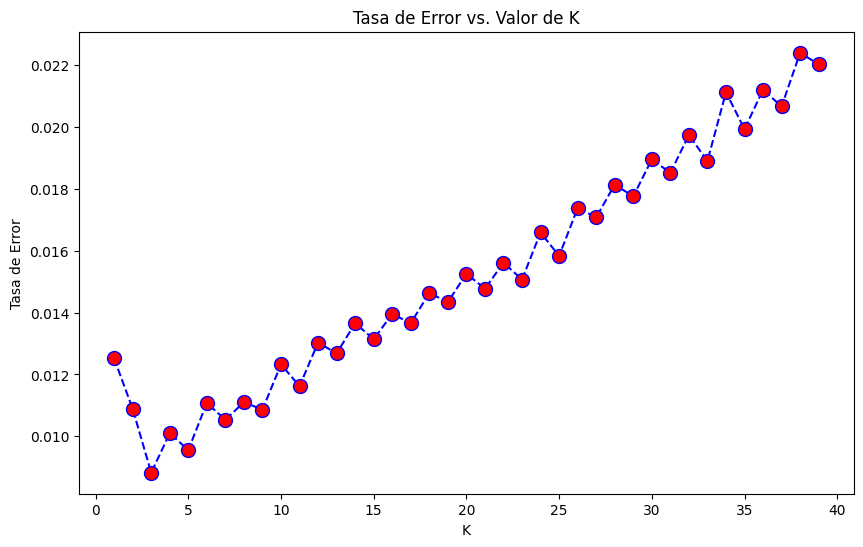

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

# Regresion Logistica


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/alext/Documentos/Proyectos/smart-software/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
dump(logmodel, 'modelo_entrenado.joblib')

['modelo_entrenado.joblib']

In [61]:
predictions = logmodel.predict(X_test)

In [62]:
y_test

14764    0
20338    0
30393    0
17389    2
17619    1
        ..
5945     0
15972    0
15026    0
17283    0
3416     0
Name: Dx_Anemia, Length: 36832, dtype: int64

In [79]:
X_test

,EdadMeses,Juntos,SIS,Qaliwarma,Hemoglobina,Suplementacion,Consejeria,Sexo_M
14764,19,0.0,1.0,0.0,11.0,1,1,False
20338,12,0.0,1.0,0.0,11.4,1,0,True
30393,7,0.0,1.0,0.0,12.1,0,0,True
17389,12,0.0,0.0,0.0,9.5,0,1,True
17619,12,0.0,1.0,0.0,10.6,1,0,False
...,...,...,...,...,...,...,...,...
5945,30,0.0,1.0,0.0,11.9,1,1,True
15972,8,0.0,0.0,0.0,11.0,0,0,False
15026,22,0.0,1.0,0.0,11.8,0,0,True
17283,15,1.0,1.0,0.0,12.5,1,0,False


In [76]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test,predictions)

array([[29478,    32,    17,     0],
       [  719,  4620,   151,     0],
       [    0,  1770,    31,     1],
       [    0,    13,     0,     0]])

In [67]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29527
           1       0.72      0.84      0.77      5490
           2       0.16      0.02      0.03      1802
           3       0.00      0.00      0.00        13

    accuracy                           0.93     36832
   macro avg       0.46      0.46      0.45     36832
weighted avg       0.90      0.93      0.91     36832

